Shape of observations: (4000, 100, 37)
Number of runs: 100
Number of dones: 3
Number of runs with dones: 4000
[ 264  462 2047  101 2047  164 2047   80  404   66  170  578   54   62
 2047   59 2047   89 2047  630 2047 2047 2047   61  177  191  166   67
    0  515  193  152  403  369 2047   61 2047 2047 1826 2047  129   60
    0  509   61 2047 2047  709 2047  226  262  441    0 2047  276  638
  376 2047 2047   89  271  186  457 2047  174 2047 2047 2047   61  182
  428   23 2047 1585  132   62   57  210   99  492 2047   62   47 2047
  268  134 2047  262  194  169  332 1287  171 2047   88 2047  294    9
 2047   84]
linvel: [[[-0.06269977 -0.08073653  0.99476147]]

 [[-0.06269977 -0.08073653  0.99476147]]

 [[-0.06419847 -0.08529683  0.99428517]]

 ...

 [[-0.40627074 -0.26321787  0.87502027]]

 [[-0.42458725 -0.27081874  0.8639345 ]]

 [[-0.44265574 -0.27833658  0.85239935]]]
angvel: [[[-0.2504487  -0.09260936 -0.24348512]]

 [[-0.2504487  -0.09260936 -0.24348512]]

 [[-0.25208864 -0.09435

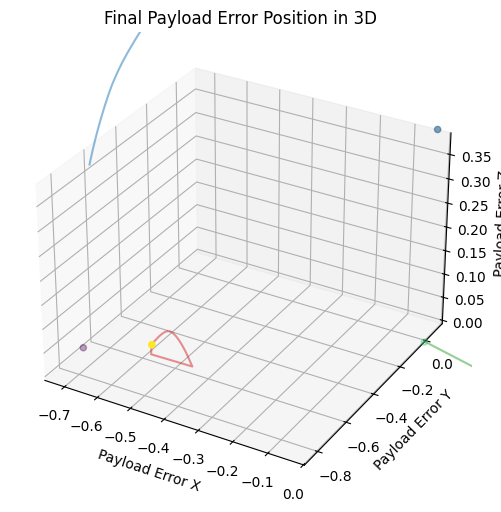

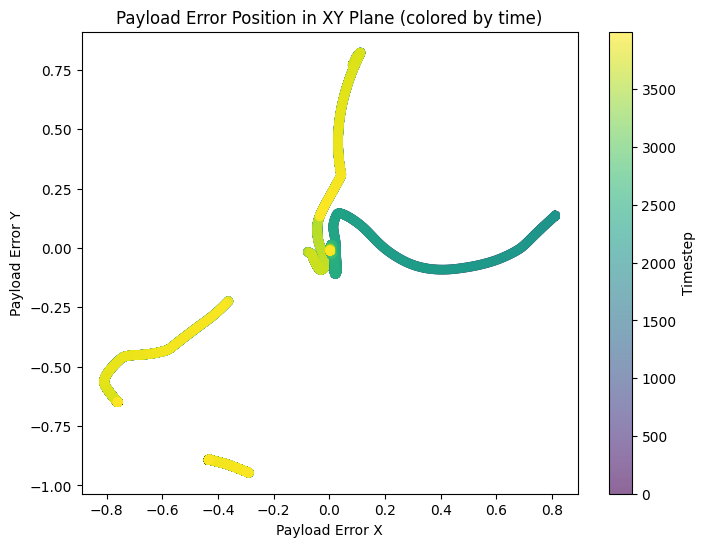

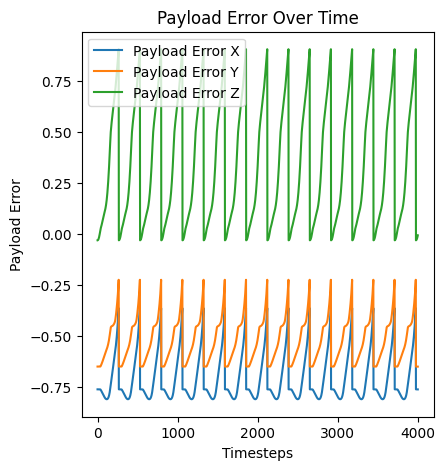

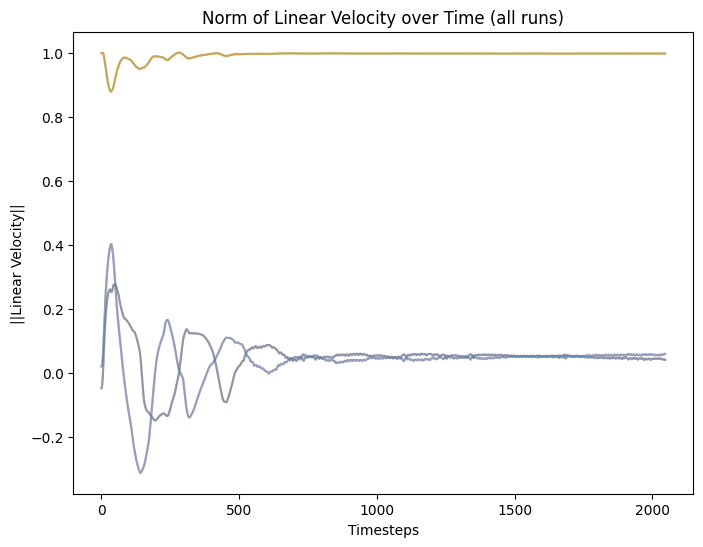

In [ ]:
import asdf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from mpl_toolkits.mplot3d import Axes3D

# Path to your ASDF file
file_path = 'flights.crazy.asdf'

# Load the ASDF file and read the observations into memory
with asdf.open(file_path) as af:
    obs = np.array(af['flights'][0]['agents']['agent_1']['observations'])
    dones = np.array(af['flights'][0]['global']['dones'])


print("Shape of observations:", obs.shape)



num_runs = 4
#count dones
num_dones = np.sum(dones[0, :])
print(f"Number of runs: {obs.shape[1]}")
print(f"Number of dones: {num_dones}")

# count runs with dones
runs_with_dones = np.sum(np.any(dones, axis=1))
print(f"Number of runs with dones: {runs_with_dones}")

# find index of first done
first_dones = np.argmax(dones,axis=0)
print(first_dones)




# Extract payload error (X, Y, Z) for the first num_runs environments
payload = obs[:, :num_runs, 0:3]  # shape (timesteps, num_runs, 3)
payload_velocity = obs[:, :num_runs, 3:6]  # shape (timesteps, num_runs, 3)
timesteps = payload.shape[0]
time = np.arange(timesteps)

other_quad_pos = obs[:, :num_runs, 6:9]  # shape (timesteps, num_runs, 3)





# print("linvel:", linvel_q1[:,:1,:])
# print("angvel:", angvel_q1[:,:1,:])

# Create 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

print(f"Payload shape (timesteps, runs, dims): {payload.shape}")

# Plot final positions in 3D
final_pos = payload[-1]
xs, ys, zs = final_pos[:, 0], final_pos[:, 1], final_pos[:, 2]
ax.scatter(xs, ys, zs, c=range(num_runs), cmap='viridis', depthshade=True)

# render path
for run in range(num_runs):

    path = payload[2000:2100, run, :]  # Extract the path for each run
    ax.plot(path[:, 0], path[:, 1], path[:, 2], alpha=0.5)  # Plot the path
# Set limits for better visualization
ax.set_xlim([np.min(xs), np.max(xs)])
ax.set_ylim([np.min(ys), np.max(ys)])
ax.set_zlim([np.min(zs), np.max(zs)])

# Labels and title
ax.set_xlabel('Payload Error X')
ax.set_ylabel('Payload Error Y')
ax.set_zlabel('Payload Error Z')
ax.set_title('Final Payload Error Position in 3D')

# plot only in xy plane with color based on time
fig2, ax2 = plt.subplots(figsize=(8, 6))
start, end = 0, 4000
times = np.arange(start, end)
for run in range(num_runs):
    path = payload[start:end, run, :]
    sc = ax2.scatter(path[:, 0], path[:, 1], c=times, cmap='viridis', alpha=0.6)
ax2.set_xlabel('Payload Error X')
ax2.set_ylabel('Payload Error Y')
ax2.set_title('Payload Error Position in XY Plane (colored by time)')
cbar = fig2.colorbar(sc, ax=ax2)
cbar.set_label('Timestep')
# Show the plots
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(time, payload[:, 0, 0], label='Payload Error X')
plt.plot(time, payload[:, 0, 1], label='Payload Error Y')
plt.plot(time, payload[:, 0, 2], label='Payload Error Z')
plt.xlabel('Timesteps')
plt.ylabel('Payload Error')
plt.title('Payload Error Over Time')
plt.legend()

# Compute the norm of linear velocity at each timestep for each run
linvel_norm = np.linalg.norm(linvel_q1, axis=2)  # shape (timesteps, num_runs)

# Plot all runs
fig3, ax3 = plt.subplots(figsize=(8, 6))
for r in range(num_runs):
    end = first_dones[2]
    linvel_norm = np.linalg.norm(linvel_q1[:end,2,:], axis=1)
    ax3.plot(time[:end], linvel_q1[:end,2,:], alpha=0.3)
ax3.set_xlabel('Timesteps')
ax3.set_ylabel('||Linear Velocity||')
ax3.set_title('Norm of Linear Velocity over Time (all runs)')
plt.show()

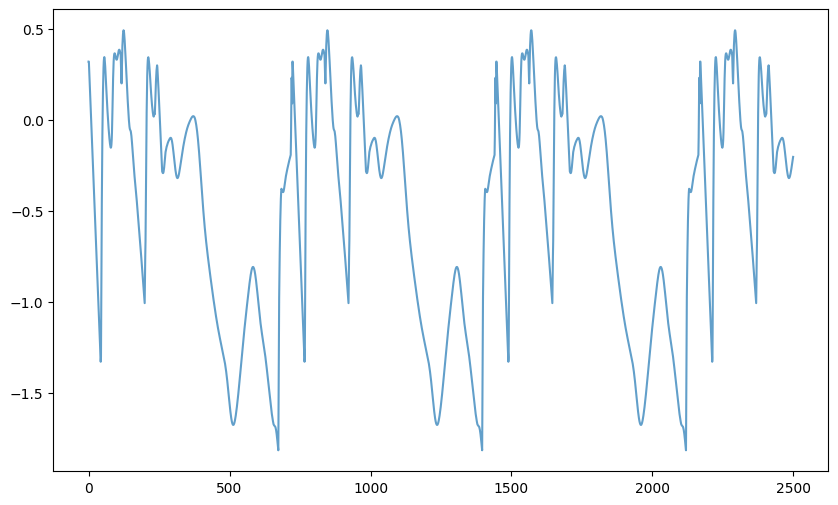

NameError: name 'abs_quad_pos' is not defined

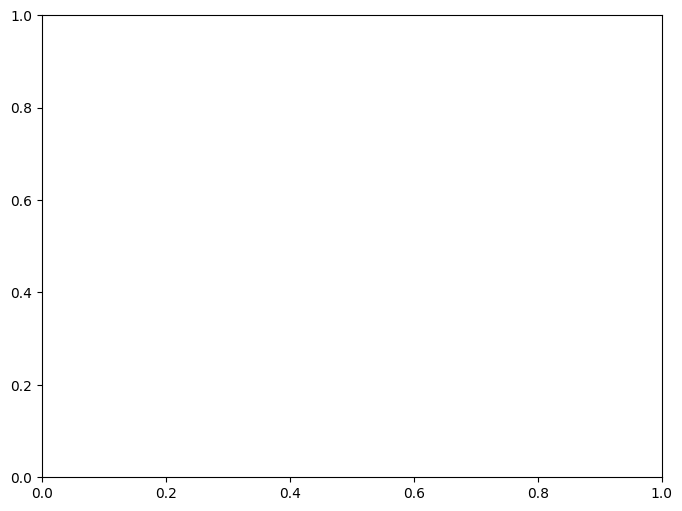